# wpływ outlierów 

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [142]:
X = np.linspace(0, 2, 100)

a = 3.14
b = 3

Y = a * X + b + 1.5 * np.random.randn(len(X))

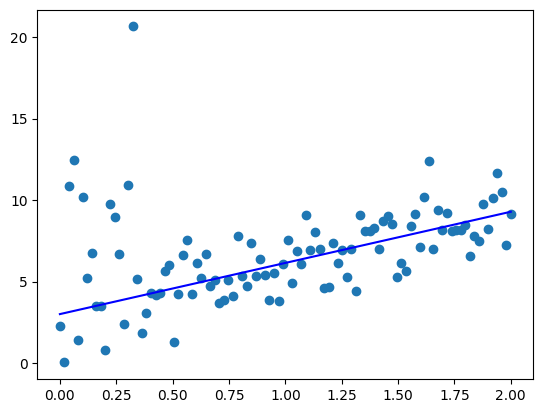

In [143]:
Y_1 = Y.copy()
outlier_points = np.random.randint(0, 20, 10)
outlier_direction = np.where(np.random.randint(-1, 1, 10) == 0, 1, 1)

for i, el in enumerate(outlier_points):
    Y_1[el] += outlier_direction[i] * 2 + 5*np.abs(np.random.randn())

plt.scatter(X, Y_1)
plt.plot(X, a*X + b, c = 'b')
plt.show()

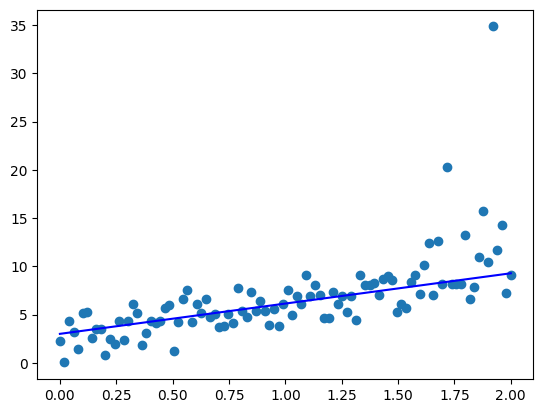

In [144]:
Y_2 = Y.copy()
outlier_points_2 = np.random.randint(80, 100, 10)
outlier_direction_2 = np.where(np.random.randint(-1, 1, 10) == 0, 1, 1) 

for i, el in enumerate(outlier_points_2):
    Y_2[el] += outlier_direction_2[i] * 2 + 5*np.abs(np.random.randn())

plt.scatter(X, Y_2)
plt.plot(X, a*X + b, c = 'b')
plt.show()

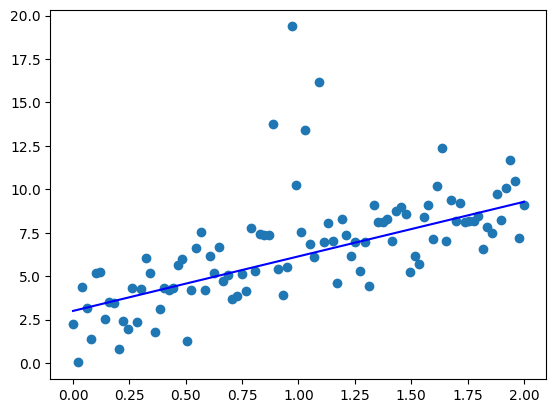

In [145]:
Y_3 = Y.copy()
outlier_points_3 = np.random.randint(40, 60, 10)
outlier_direction_3 = np.where(np.random.randint(-1, 1, 10) == 0, 1, 1) 

for i, el in enumerate(outlier_points_3):
    Y_3[el] += outlier_direction_3[i] * 2 + 5*np.abs(np.random.randn())

plt.scatter(X, Y_3)
plt.plot(X, a*X + b, c = 'b')
plt.show()

In [169]:
# definiowanie metryk

def mse(initial_params, X, Y):
    a, b = initial_params
    Y_pred = a * X + b
    return np.mean((Y - Y_pred) ** 2)

def mae(initial_params, X, Y):
    a, b = initial_params
    Y_pred = a * X + b
    return np.mean(np.abs(Y - Y_pred))

def mape(initial_params, X, Y):
    a, b = initial_params
    Y_pred = a * X + b
    return np.mean(np.abs((Y - Y_pred) / Y))

def smape(initial_params, X, Y):
    a, b = initial_params
    Y_pred = a * X + b
    return np.mean(np.abs((Y - Y_pred) / (np.abs(Y) + np.abs(Y_pred))))


In [177]:
initial_params = 0, 0
MSE = minimize(mse, initial_params, args=(X, Y))
print(MSE)
MAE = minimize(mae, initial_params, args=(X, Y))
print(MAE)
MAPE = minimize(mape, initial_params, args=(X, Y))
print(MAPE)
SMAPE = minimize(smape, initial_params, args=(X, Y))
print(SMAPE)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.115603623039921
        x: [ 3.337e+00  2.737e+00]
      nit: 5
      jac: [ 2.980e-08  2.980e-08]
 hess_inv: [[ 1.470e+00 -1.470e+00]
            [-1.470e+00  1.970e+00]]
     nfev: 18
     njev: 6
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.1647726091957242
        x: [ 3.091e+00  2.931e+00]
      nit: 8
      jac: [-2.020e-03  0.000e+00]
 hess_inv: [[ 3.746e-01 -4.487e-01]
            [-4.487e-01  7.980e-01]]
     nfev: 223
     njev: 73
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.3193104518168112
        x: [ 5.483e+00 -7.839e-02]
      nit: 6
      jac: [ 2.053e-03  1.473e-01]
 hess_inv: [[ 1.106e+01 -1.396e+00]
            [-1.396e+00  4.045e-01]]
     nfev: 219
     njev: 69
  message: Desired error not necessarily achieved due to precision loss.
 

In [174]:
# wybierz losowy kolor bez powtorzen
def random_color():
    return np.random.rand(3,)

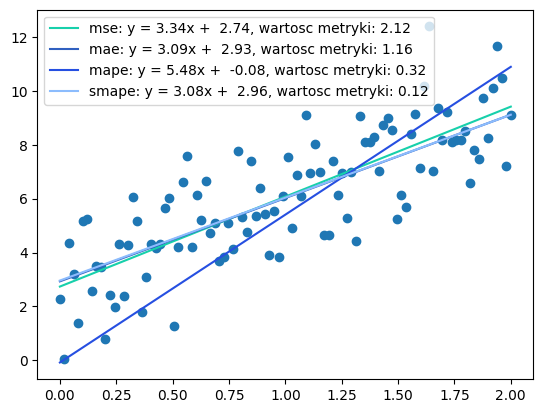

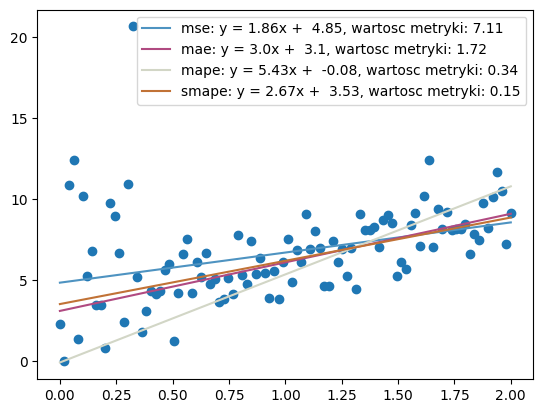

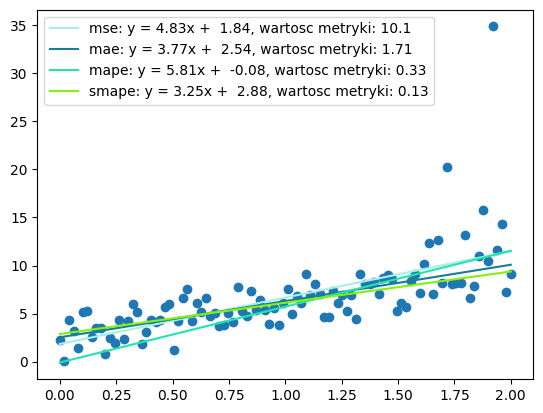

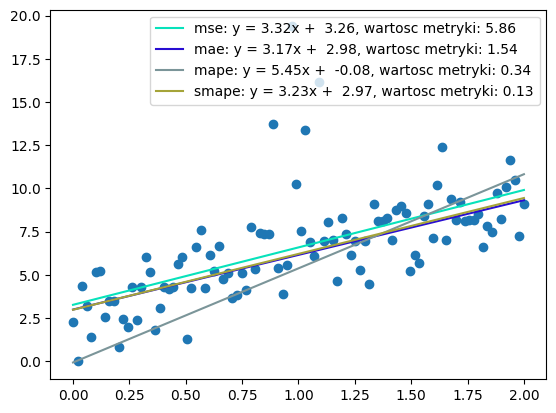

In [ ]:
for Y_ in [Y, Y_1, Y_2, Y_3]:
    plt.scatter(X, Y_)
    for metric in [mse, mae, mape, smape]:
        initial_params = 0, 0
        metric_value = minimize(metric, initial_params, args=(X, Y_))
        title = f"{metric.__name__}: y = {metric_value.x[0].round(2)}x +  {metric_value.x[1].round(2)}, wartosc metryki: {metric(metric_value.x, X, Y_).round(2)}"
        plt.plot(X, metric_value.x[0] * X + metric_value.x[1], label=title, color = random_color())
    plt.legend()
    plt.show()
  

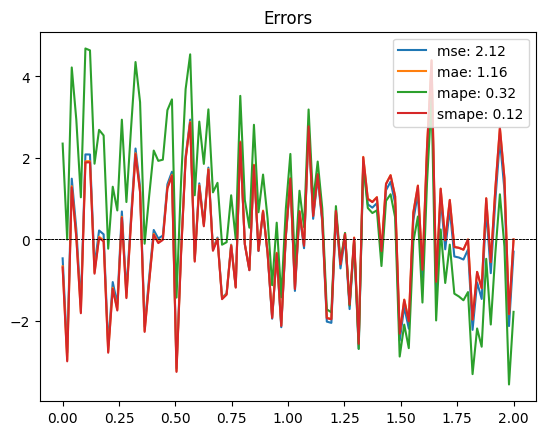

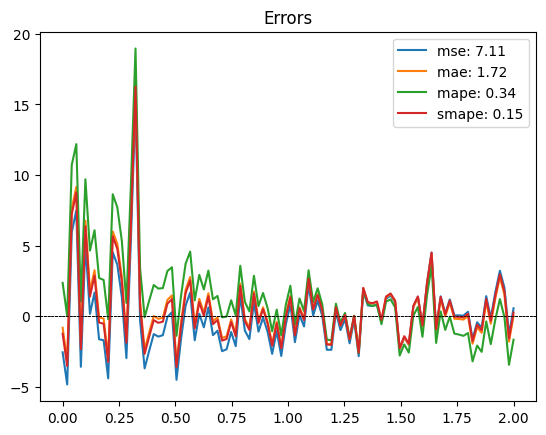

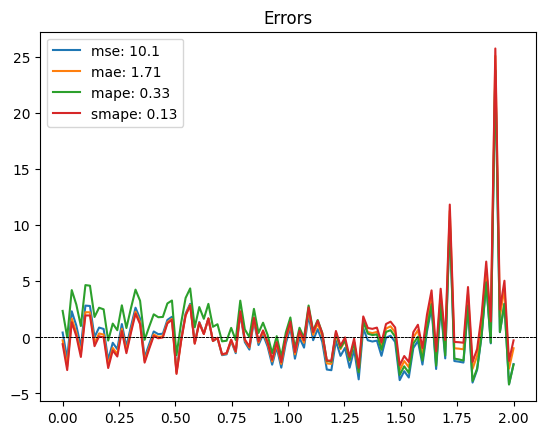

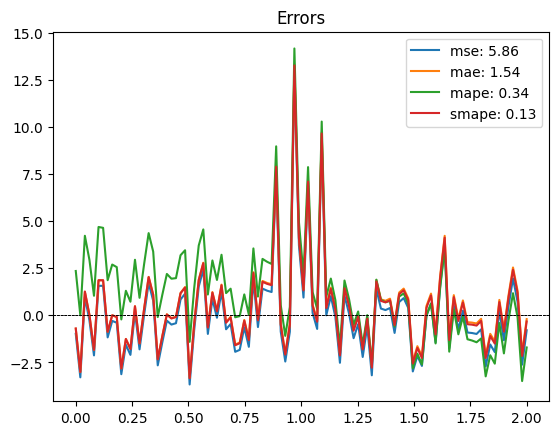

In [187]:
# wykres z błędami
def plot_errors(X, Y, initial_points):
    a, b = initial_points
    Y_pred = a * X + b
    errors = Y - Y_pred
    return errors

for Y_ in [Y, Y_1, Y_2, Y_3]:
    for metric in [mse, mae, mape, smape]:
        initial_params = 0, 0
        metric_value = minimize(metric, initial_params, args=(X, Y_))
        title = f"{metric.__name__}: {metric(metric_value.x, X, Y_).round(2)}"
        errors = plot_errors(X, Y_, metric_value.x)
        plt.plot(X, errors, label=title)
        plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.title("Errors")
    plt.show()
